# Exploratory Data Analysis (EDA) On Titanic Dataset

# Import The Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read The Data

In [3]:
titanic_dataframe = pd.read_csv('/content/drive/MyDrive/Data_For_Analysis/train.csv')
df = titanic_dataframe.copy()
df.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


# Info & Describe to see information about the data, check duplicate, check missing values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Insights:
## there is missing data in age, cabin and embarked column we will see how we can fill them later
## there is few skewness by looking to mean and median
##no duplicated records

In [8]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# split numerical features and categorical features

In [9]:
df_numerical_features = df[['Age','Fare', 'SibSp', 'Parch']]
df_numerical_features.head()

,Age,Fare,SibSp,Parch
0,22.0,7.2500,1,0
1,38.0,71.2833,1,0
2,26.0,7.9250,0,0
3,35.0,53.1000,1,0
4,35.0,8.0500,0,0


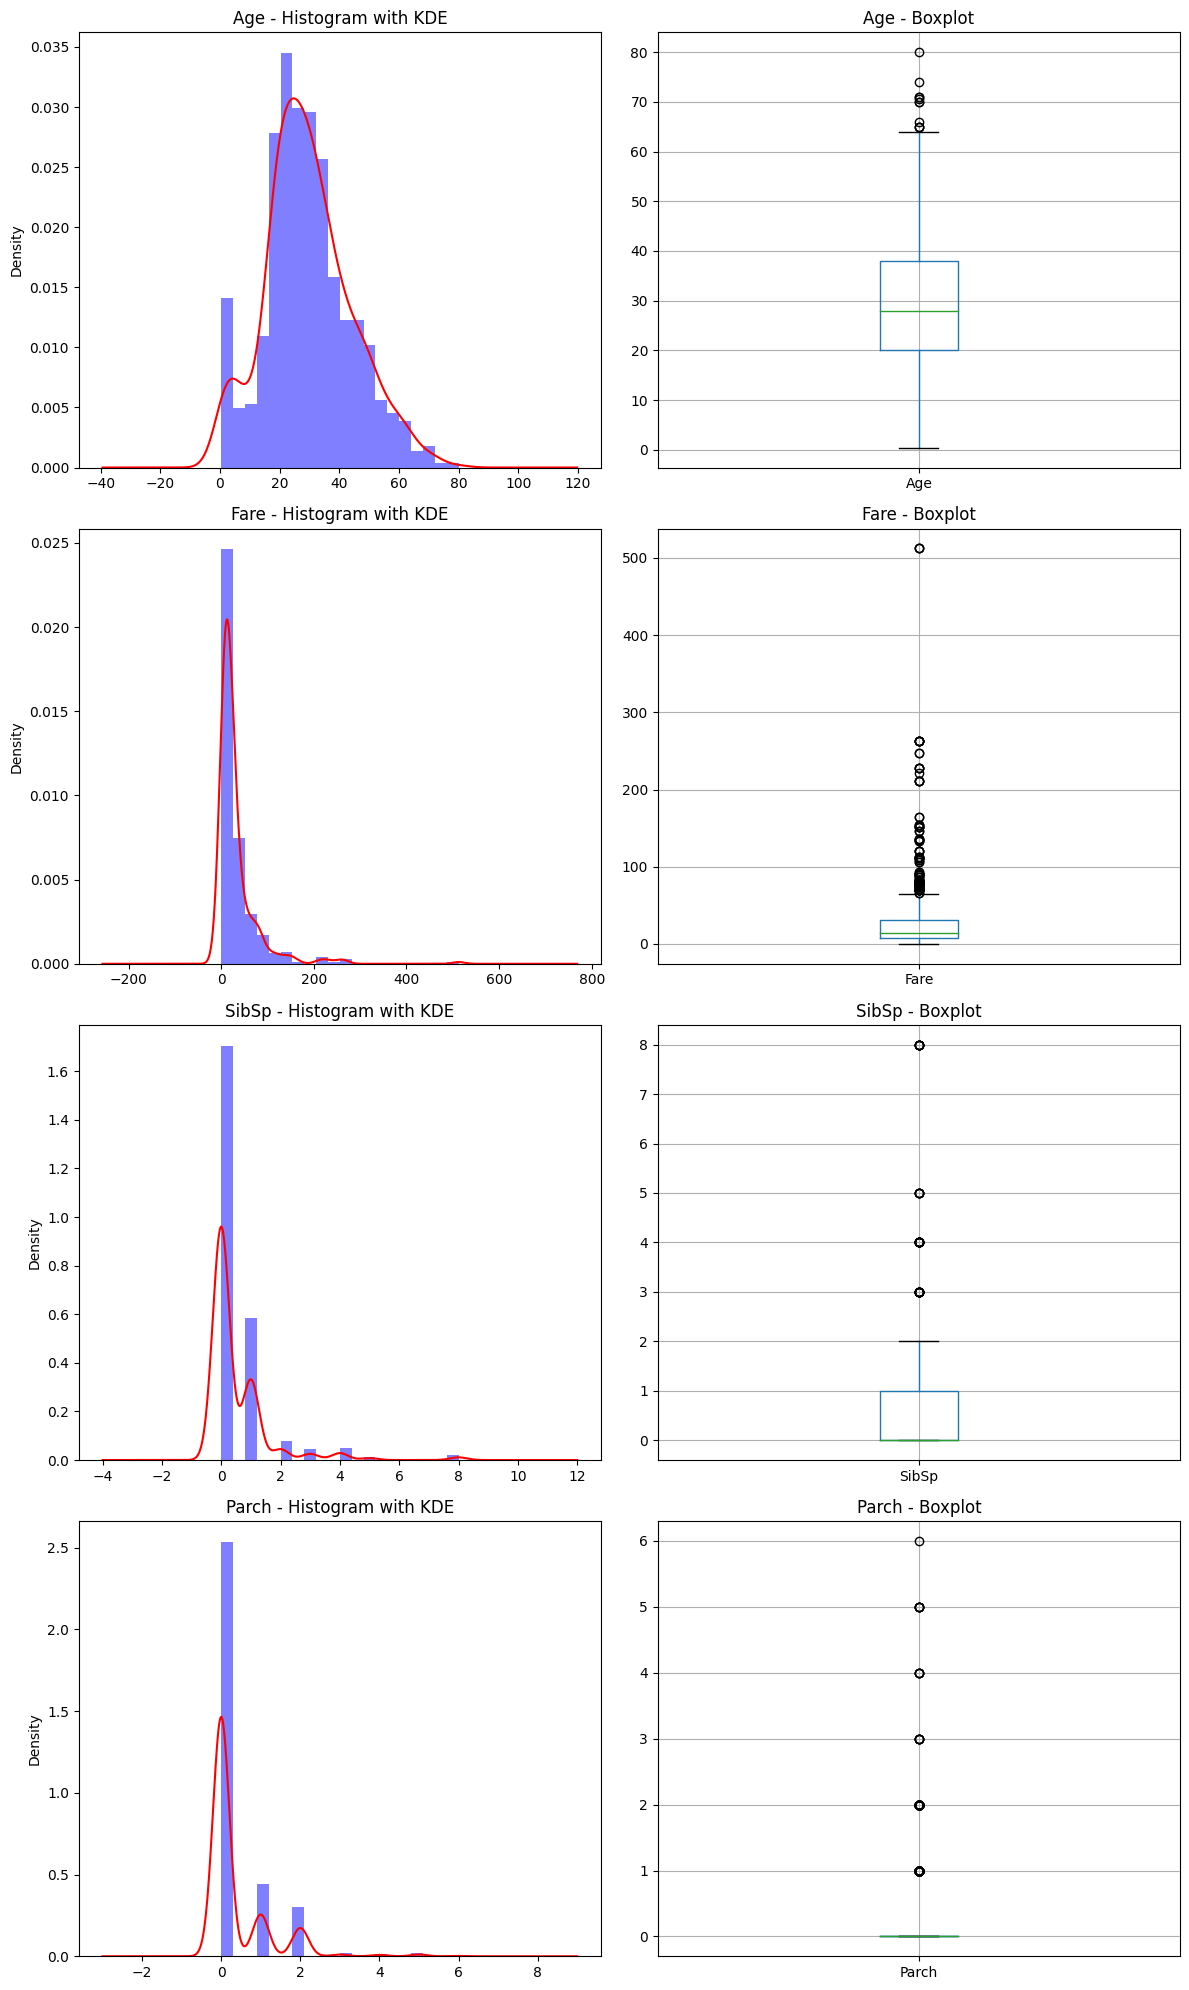

In [10]:
# Plotting Histogram with KDE and Boxplot for each numerical feature
fig, axes = plt.subplots(len(df_numerical_features.columns), 2, figsize=(12, 5 * len(df_numerical_features.columns)))

for i, col in enumerate(df_numerical_features.columns):
    # Histogram with KDE
    df_numerical_features[col].plot(kind='hist', density=True, ax=axes[i, 0], bins=20, alpha=0.5, color='blue')
    df_numerical_features[col].plot(kind='kde', ax=axes[i, 0], color='red')
    axes[i, 0].set_title(f'{col} - Histogram with KDE')

    # Boxplot
    df_numerical_features.boxplot(column=col, ax=axes[i, 1])
    axes[i, 1].set_title(f'{col} - Boxplot')

plt.tight_layout()
plt.show()

# Insights:
## there are outliers in most of numeric columns

In [11]:
df_categorical_features = df[['Survived', 'Pclass', 'Sex', 'Embarked']]
df_categorical_features

,Survived,Pclass,Sex,Embarked
0,0,3,male,S
1,1,1,female,C
2,1,3,female,S
3,1,1,female,S
4,0,3,male,S
...,...,...,...,...
886,0,2,male,S
887,1,1,female,S
888,0,3,female,S
889,1,1,male,C


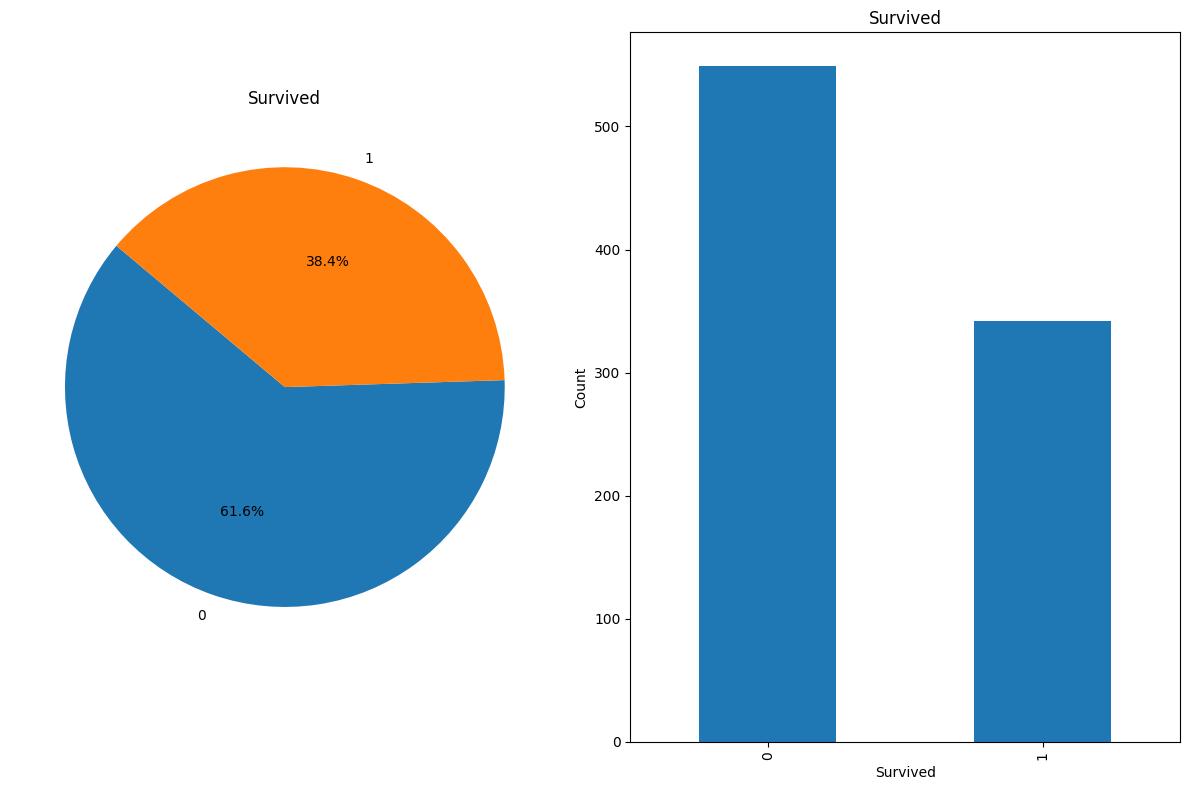

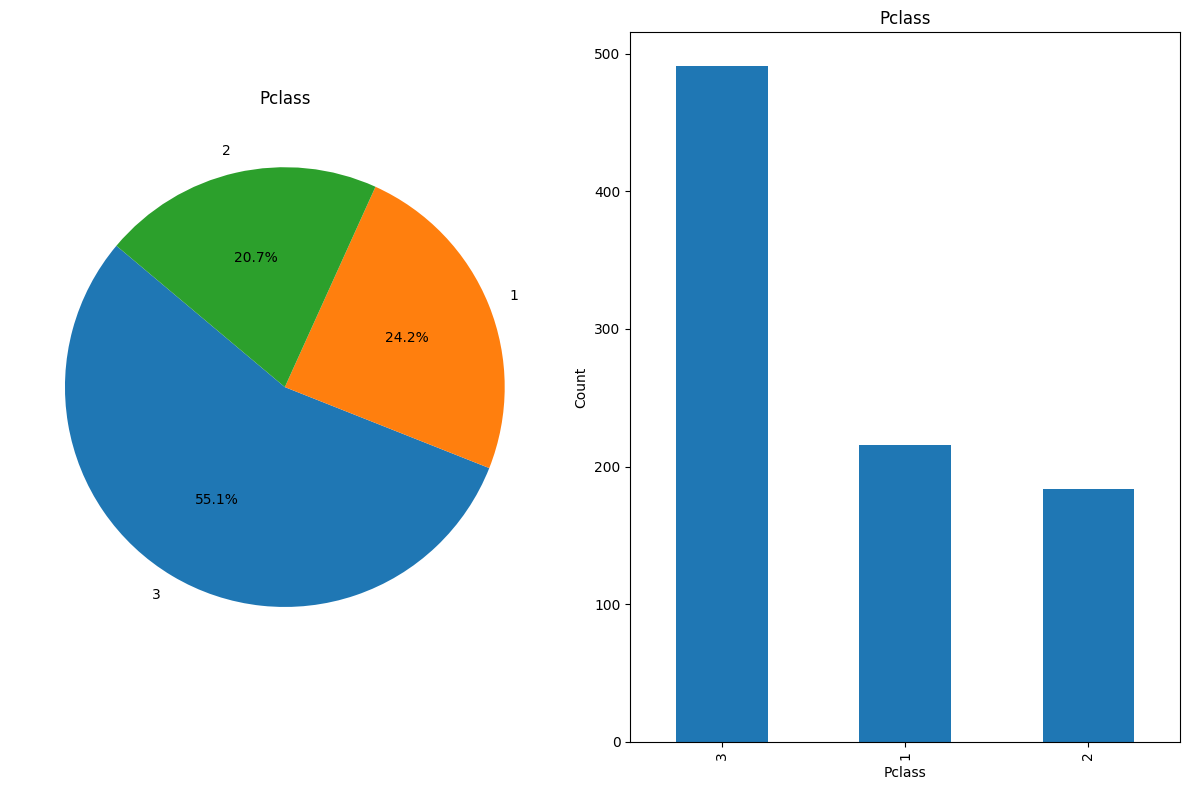

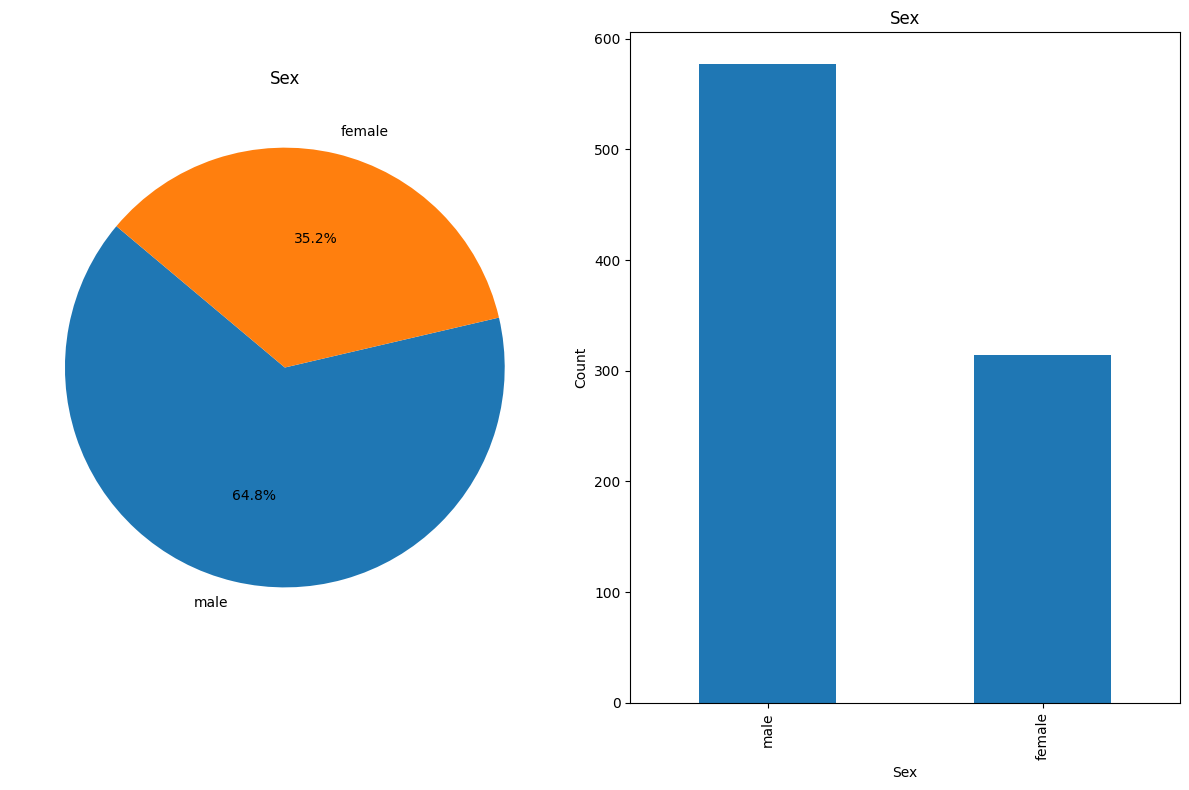

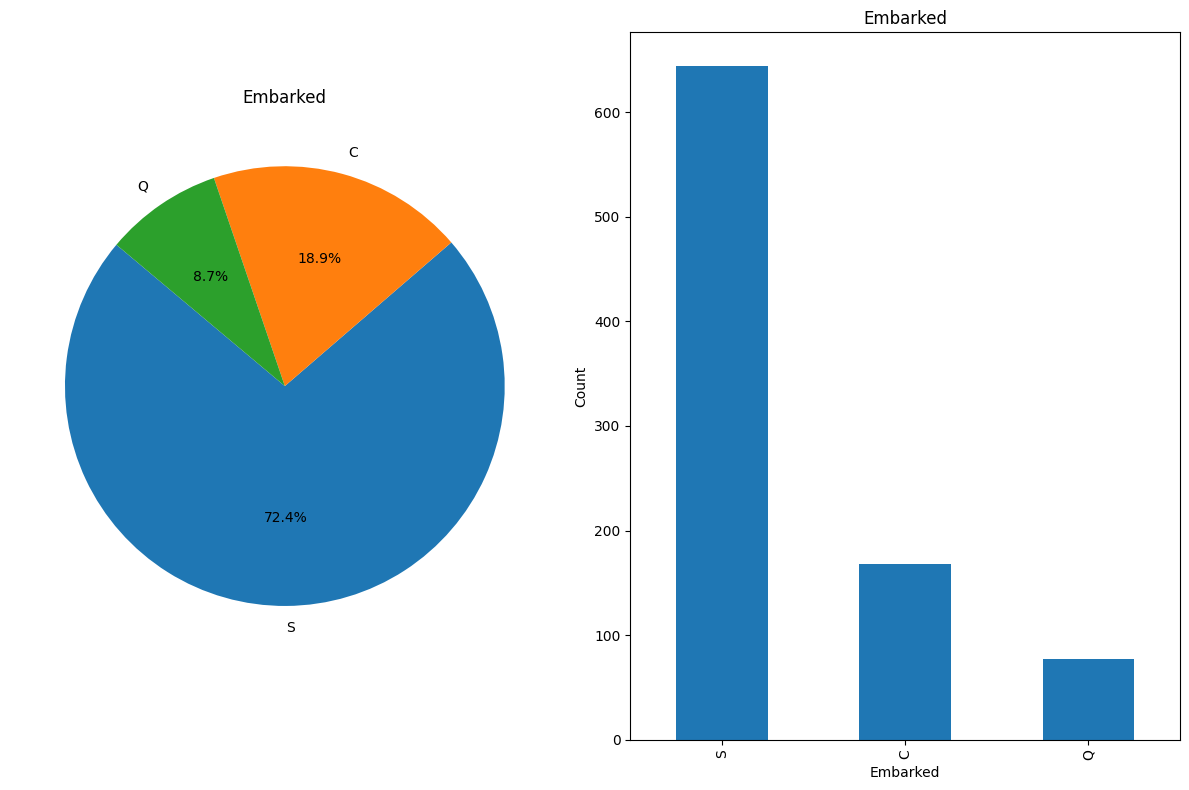

In [12]:
for i in df_categorical_features.columns:
  counts = df_categorical_features[i].value_counts()

  # Plotting
  fig, axes = plt.subplots(1, 2, figsize=(12, 8))

  # Pie chart
  axes[0].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
  axes[0].set_title(i)

  # Bar chart
  counts.plot(kind='bar', ax=axes[1])
  axes[1].set_title(i)
  axes[1].set_ylabel('Count')
  axes[1].set_xlabel(i)

  plt.tight_layout()
  plt.show()

# now we will fill missing

In [14]:
# Fill missing Age with median
df['Age'].fillna(df['Age'].median(), inplace=True)
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
# Fill missing Embarked with the most common value (mode)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

# we will ignore cabin because we don't care about cabin number

In [16]:
from sklearn.preprocessing import LabelEncoder

# Create separate label encoders for Sex and Embarked
sex_encoder = LabelEncoder()
embarked_encoder = LabelEncoder()

# Encode Sex and Embarked columns
df['Sex_encoded'] = sex_encoder.fit_transform(df['Sex'])
df['Embarked_encoded'] = embarked_encoder.fit_transform(df['Embarked'])

# Select the desired columns (excluding the original Sex and Embarked)
selected_features = ['Age', 'Fare', 'SibSp', 'Parch', 'Survived', 'Pclass', 'Sex_encoded', 'Embarked_encoded']
encoded_data = df[selected_features]

# (Optional) Check the encoded data
print(encoded_data.head())

    Age     Fare  SibSp  Parch  Survived  Pclass  Sex_encoded  \
0  22.0   7.2500      1      0         0       3            1   
1  38.0  71.2833      1      0         1       1            0   
2  26.0   7.9250      0      0         1       3            0   
3  35.0  53.1000      1      0         1       1            0   
4  35.0   8.0500      0      0         0       3            1   

   Embarked_encoded  
0                 2  
1                 0  
2                 2  
3                 2  
4                 2  


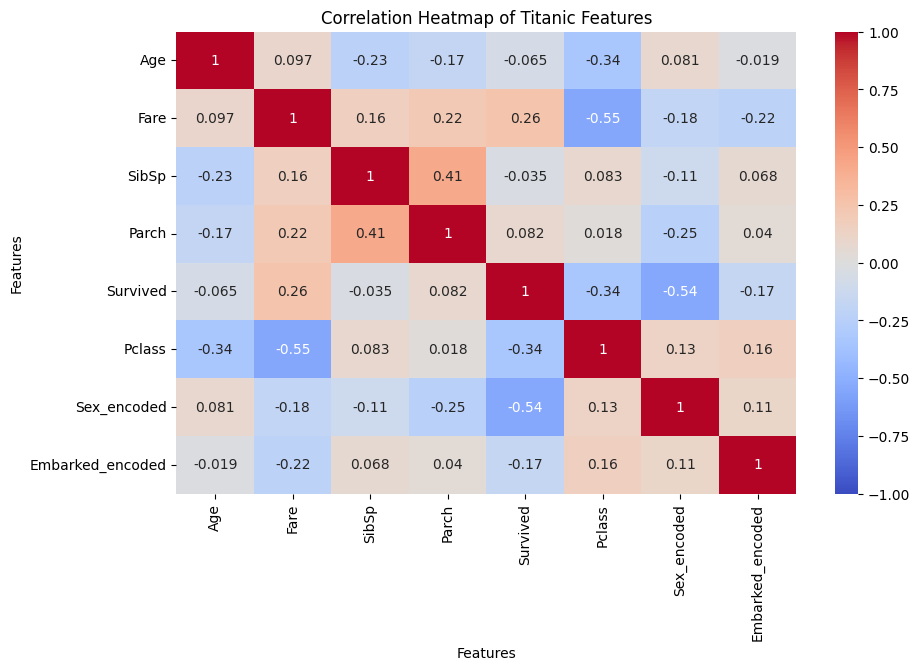

In [17]:
# Calculate correlation matrix
correlation = encoded_data.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.heatmap(correlation, vmin=-1, vmax=1, annot=True, cmap='coolwarm')  # Customize colormap and annotations

# Add labels and title
plt.xlabel('Features')
plt.ylabel('Features')
plt.title('Correlation Heatmap of Titanic Features')

# Display the heatmap
plt.show()

# insights
## we draw heat map to see correlation between features

# draw survival rate by sex

In [18]:
# Assuming your data is encoded and stored in 'encoded_data' DataFrame

# Group data by Sex and calculate survival rate (mean of Survived)
survival_by_sex = encoded_data.groupby('Sex_encoded')['Survived'].mean()
survival_by_sex

Sex_encoded
0    0.742038
1    0.188908
Name: Survived, dtype: float64

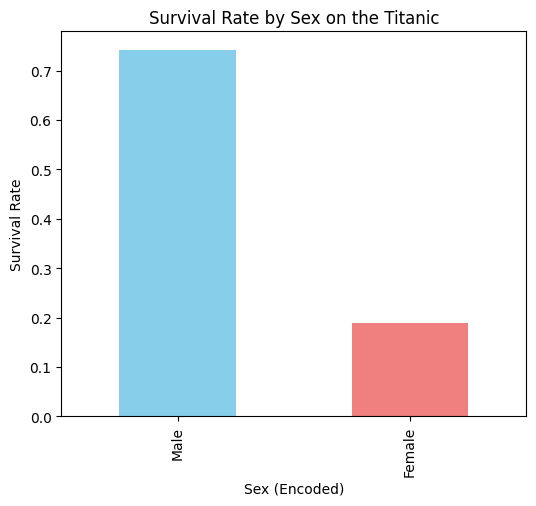

In [19]:
# Create a bar chart
plt.figure(figsize=(6, 5))  # Adjust the figure size as needed
survival_by_sex.plot(kind='bar', color=['skyblue', 'lightcoral'])  # Customize colors
plt.xlabel('Sex (Encoded)')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Sex on the Titanic')
plt.xticks([0, 1], ['Male', 'Female'])  # Set custom labels for encoded sex categories

# Display the bar chart
plt.show()

# draw survival rate by pclass

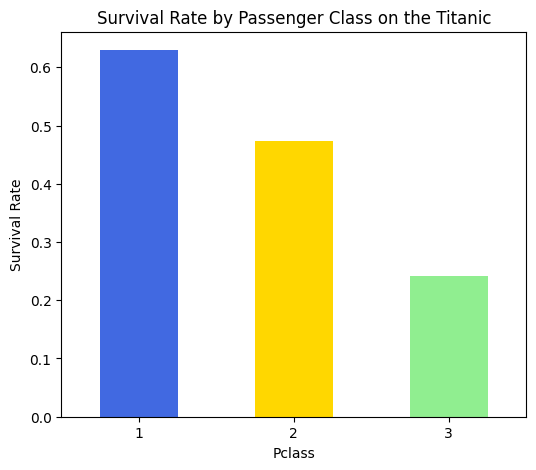

In [20]:
# Group data by Pclass and calculate survival rate (mean of Survived)
survival_by_pclass = encoded_data.groupby('Pclass')['Survived'].mean()

# Create a bar chart
plt.figure(figsize=(6, 5))  # Adjust the figure size as needed
survival_by_pclass.plot(kind='bar', color=['royalblue', 'gold', 'lightgreen'])  # Customize colors
plt.xlabel('Pclass')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Passenger Class on the Titanic')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability

# Display the bar chart
plt.show()

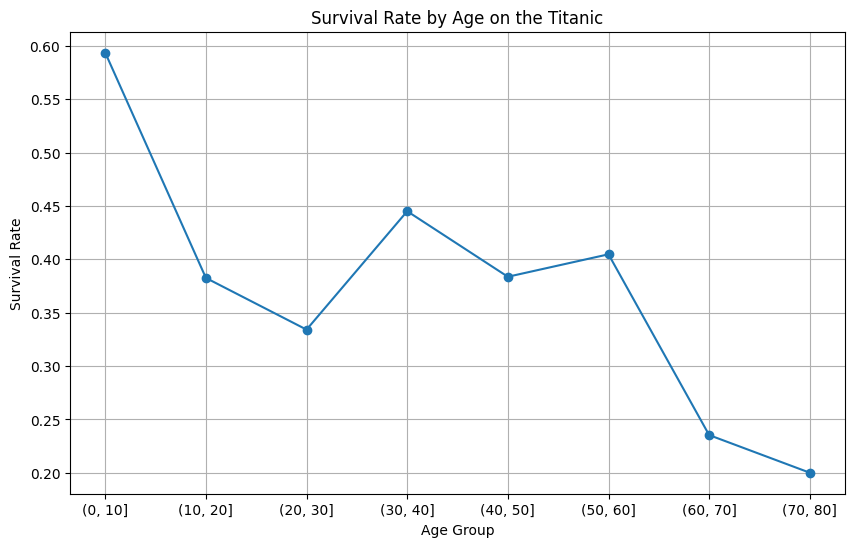

In [21]:
# Group data by age bins and calculate survival rate (mean of Survived)
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 100]
survival_by_age = encoded_data.groupby(pd.cut(encoded_data['Age'], bins=age_bins))['Survived'].mean()

# Create a line plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
survival_by_age.plot(kind='line', marker='o', linestyle='-')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Age on the Titanic')
plt.grid(True)  # Add grid lines for better readability

# Display the line plot
plt.show()

# the end ❤ 🥇